In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import scale

%matplotlib inline
mpl.rcParams['figure.figsize'] = [12, 8]

In [25]:
order_types = pd.read_csv('../../data/features/order_types.csv', index_col='label')

In [26]:
order_types.head()

,reordered,organic,popular,prepared,dairy,gluten,snack,meat,fish,beverage,veg,order_dow,order_hour_of_day,days_since_prior_order,order_size
label,,,,,,,,,,,,,,,
1,0.640120,0.275375,0.146733,0.185948,0.103021,0.113885,0.115612,0.000000,0.000000,0.128550,0.332224,1,10,30.0,4.0
2,0.619680,0.194351,0.114928,0.421715,0.081952,0.063514,0.114628,0.383320,0.220379,0.061048,0.191051,1,15,30.0,1.0
3,0.612420,0.291615,0.118568,0.263033,0.130706,0.109397,0.100988,0.096080,0.075177,0.042472,0.322949,0,14,30.0,12.0
4,0.617094,0.137013,0.117449,0.128147,0.012973,0.355693,0.472128,0.135951,0.000000,0.116885,0.063747,1,10,30.0,1.0
5,0.637070,0.269136,0.132346,0.225954,0.141813,0.113271,0.121195,0.088181,0.000000,0.103714,0.278326,0,11,7.0,13.0


Text(0.5, 51.0, 'cluster label')

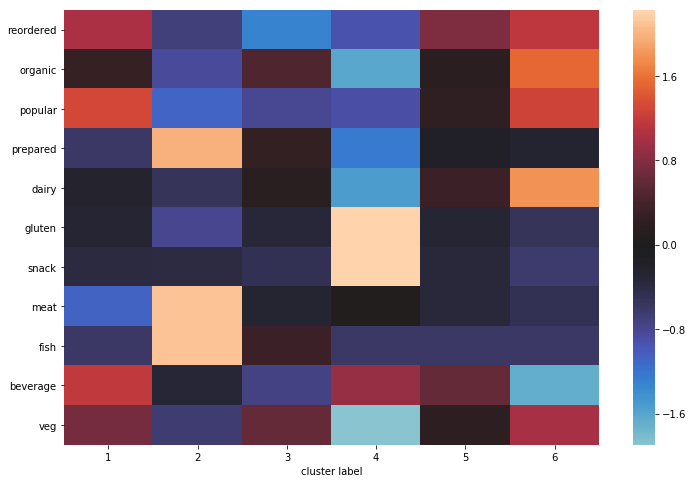

In [39]:
sub = order_types.columns[:11]
plot_data = pd.DataFrame(scale(order_types[sub]), columns=sub).transpose()
ax = sns.heatmap(plot_data, center=0, xticklabels=list(order_types.index))
plt.xlabel('cluster label')
# plt.show()

In [41]:
plt.savefig('test.png')

<Figure size 864x576 with 0 Axes>

In [36]:
import os
os.getcwd()

'/Users/michaelfedell/Programming_Projects/instacart/notebooks/develop'